In [41]:
import pandas as pd
import plotly.express as px 
 

In [42]:
df = pd.read_excel('temp.xlsx', index_col=0) 

In [43]:
fig = px.line(df, x="date", y="TOTAL CHARGE", title='Evolution charge')
fig.show()

In [44]:
from datetime import datetime

In [45]:
df['date'] = df['date'].astype('datetime64[D]')

In [46]:
df.head()

,day,mois,annee,date,TOTAL CHARGE
0,7,10,18,2018-07-10,61369.14
1,8,10,18,2018-08-10,7800.00
2,14,10,18,2018-10-14,35700.10
3,21,10,18,2018-10-21,38946.86
4,28,10,18,2018-10-28,84771.08


In [47]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [49]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

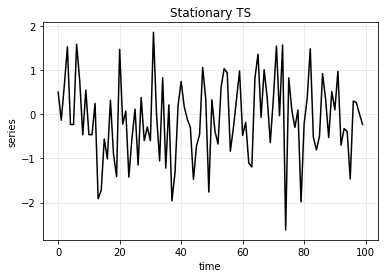

In [50]:
run_sequence_plot(time, stationary, 
                  title="Stationary TS")

In [51]:
from matplotlib import pyplot
da = pd.read_excel('temp.xlsx', index_col=0) 
da.columns



Index(['day', 'mois', 'annee', 'date', 'TOTAL CHARGE'], dtype='object')

In [52]:
da=da[['date','TOTAL CHARGE']]

In [53]:
da.head()

,date,TOTAL CHARGE
0,7/10/18,61369.14
1,8/10/18,7800.00
2,14/10/18,35700.10
3,21/10/18,38946.86
4,28/10/18,84771.08


In [54]:
da['date'] = da['date'].astype('datetime64[D]')

In [55]:
da.head()

,date,TOTAL CHARGE
0,2018-07-10,61369.14
1,2018-08-10,7800.00
2,2018-10-14,35700.10
3,2018-10-21,38946.86
4,2018-10-28,84771.08


In [58]:
dp = pd.read_excel('data_finale_master.xlsx', index_col=0) 

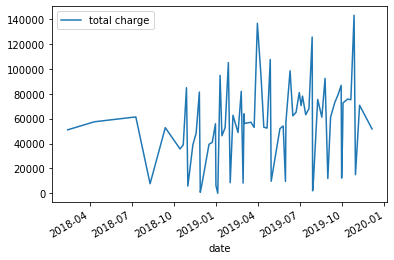

In [59]:
dp.plot()
pyplot.show()

In [61]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dp,freq=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual= decomposition.resid

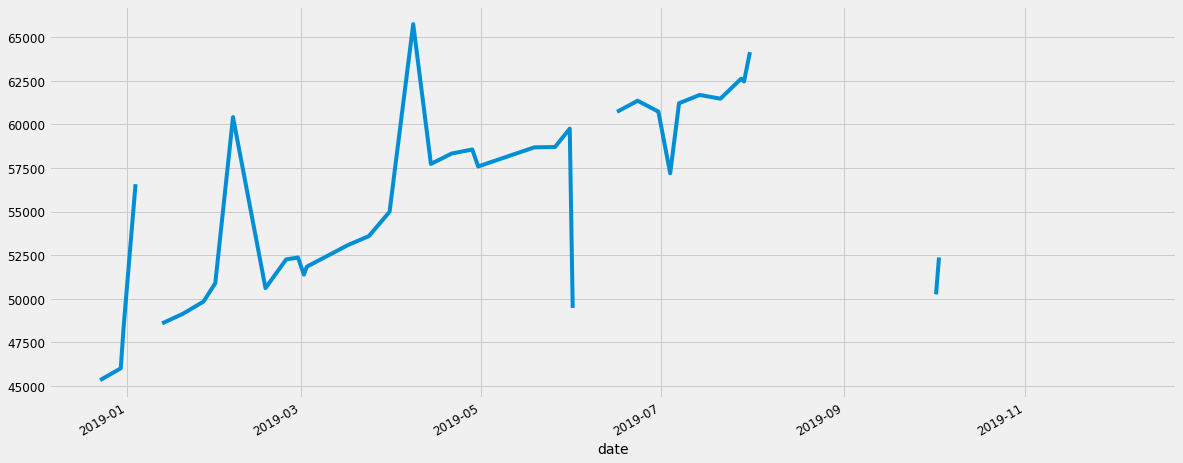

In [65]:
trend.plot()
pyplot.show()

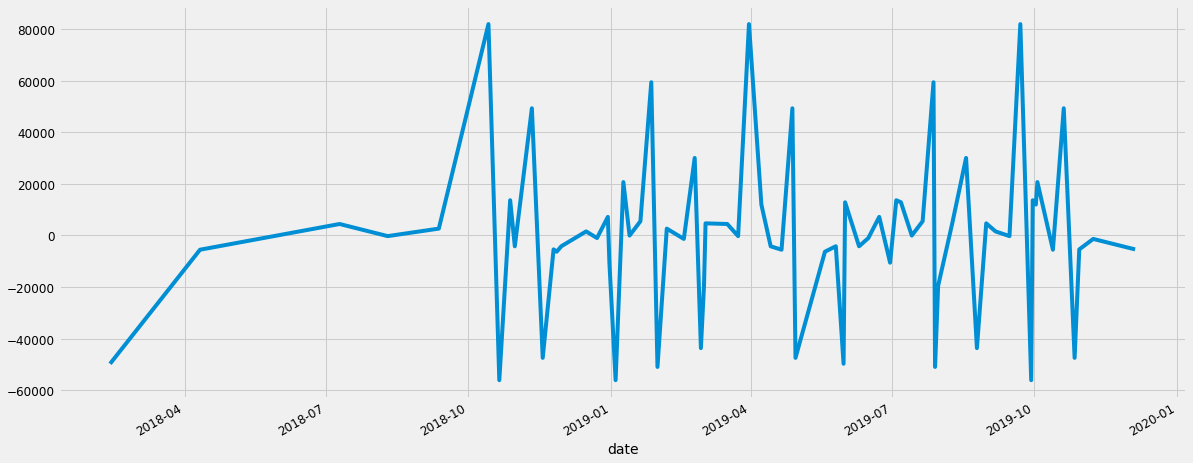

In [66]:
seasonal.plot()
pyplot.show()

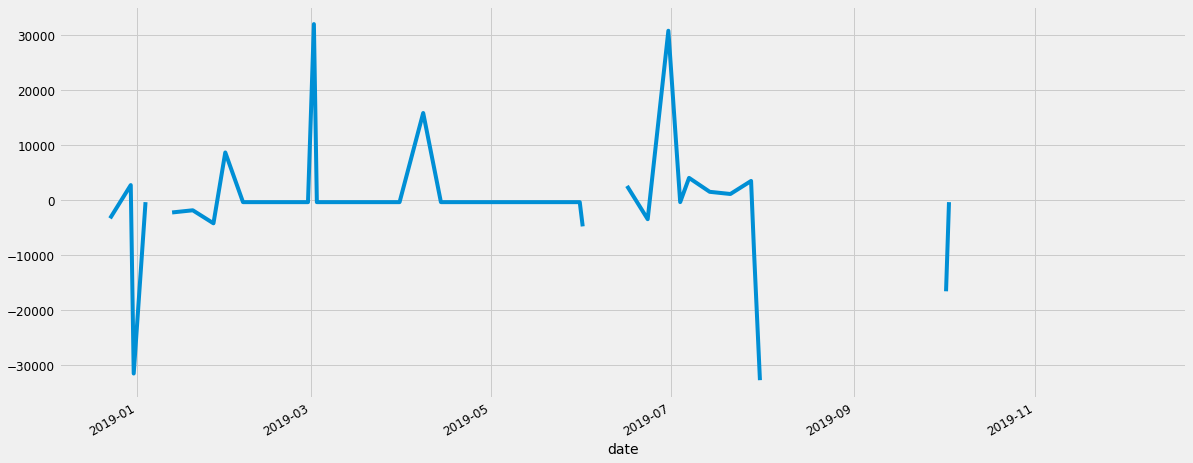

In [67]:
residual.plot()
pyplot.show()

In [68]:


import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [69]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None

In [70]:
def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [72]:
list_val=dp['total charge'].to_list()
    

In [73]:
list_val

[61369.14,
 7800.0,
 35700.1,
 38946.86000000001,
 84771.08,
 5888.93,
 57470.46,
 39165.05999999999,
 48238.82000000001,
 81305.52000000003,
 900.0,
 6334.96,
 51017.91999999998,
 52743.21999999999,
 39438.95,
 40983.04,
 55895.42999999999,
 6343.860000000001,
 57504.96999999998,
 46262.89,
 52763.16,
 104948.03,
 8575.51,
 63852.03,
 45615.82,
 48856.71000000002,
 81882.15000000001,
 8307.0,
 56130.84999999999,
 72644.59999999999,
 57122.83000000002,
 52936.03000000001,
 136477.65,
 100.0,
 70438.27,
 53134.28,
 52402.84000000001,
 107433.05,
 9768.03,
 51718.88999999999,
 51990.94,
 54125.52000000003,
 9652.109999999999,
 62675.13000000003,
 61216.45000000002,
 62273.35,
 65054.26000000002,
 80947.87000000001,
 78072.57,
 63128.66,
 68075.52000000002,
 125438.55,
 2100.0,
 11903.93,
 93537.4,
 70710.53000000001,
 61156.96999999999,
 92314.92000000004,
 11922.94,
 94711.28000000003,
 75434.68,
 72816.92,
 78986.35000000002,
 86658.24999999999,
 12325.98,
 98374.25999999998,
 75651.70

In [75]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(list_val)

In [76]:
print(pvalue)

4.780817462682174e-18


In [77]:
print(adf)

-10.239862909236244


In [78]:
print(critical_values)

{'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}


In [79]:
import pandas as pd
dp = pd.read_excel('data_finale_master.xlsx', index_col=0) 

In [80]:
dp.head()

,total charge
date,
2018-07-10,61369.14
2018-08-10,7800.00
2018-10-14,35700.10
2018-10-21,38946.86
2018-10-28,84771.08


In [81]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [82]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [83]:
dataset = dp.values
dataset = dataset.astype('float32')

In [84]:
dataset

array([[6.1369141e+04],
       [7.8000000e+03],
       [3.5700102e+04],
       [3.8946859e+04],
       [8.4771078e+04],
       [5.8889302e+03],
       [5.7470461e+04],
       [3.9165059e+04],
       [4.8238820e+04],
       [8.1305523e+04],
       [9.0000000e+02],
       [6.3349600e+03],
       [5.1017922e+04],
       [5.2743219e+04],
       [3.9438949e+04],
       [4.0983039e+04],
       [5.5895430e+04],
       [6.3438599e+03],
       [5.7504969e+04],
       [4.6262891e+04],
       [5.2763160e+04],
       [1.0494803e+05],
       [8.5755098e+03],
       [6.3852031e+04],
       [4.5615820e+04],
       [4.8856711e+04],
       [8.1882148e+04],
       [8.3070000e+03],
       [5.6130852e+04],
       [7.2644602e+04],
       [5.7122828e+04],
       [5.2936031e+04],
       [1.3647766e+05],
       [1.0000000e+02],
       [7.0438273e+04],
       [5.3134281e+04],
       [5.2402840e+04],
       [1.0743305e+05],
       [9.7680303e+03],
       [5.1718891e+04],
       [5.1990941e+04],
       [5.412552

In [85]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [86]:
print(len(dataset))

70


In [88]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [89]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [90]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [91]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
44/44 - 0s - loss: 0.1164
Epoch 2/100
44/44 - 0s - loss: 0.0864
Epoch 3/100
44/44 - 0s - loss: 0.0692
Epoch 4/100
44/44 - 0s - loss: 0.0590
Epoch 5/100
44/44 - 0s - loss: 0.0547
Epoch 6/100
44/44 - 0s - loss: 0.0520
Epoch 7/100
44/44 - 0s - loss: 0.0509
Epoch 8/100
44/44 - 0s - loss: 0.0500
Epoch 9/100
44/44 - 0s - loss: 0.0493
Epoch 10/100
44/44 - 0s - loss: 0.0491
Epoch 11/100
44/44 - 0s - loss: 0.0481
Epoch 12/100
44/44 - 0s - loss: 0.0472
Epoch 13/100
44/44 - 0s - loss: 0.0469
Epoch 14/100
44/44 - 0s - loss: 0.0463
Epoch 15/100
44/44 - 0s - loss: 0.0463
Epoch 16/100
44/44 - 0s - loss: 0.0455
Epoch 17/100
44/44 - 0s - loss: 0.0449
Epoch 18/100
44/44 - 0s - loss: 0.0442
Epoch 19/100
44/44 - 0s - loss: 0.0437
Epoch 20/100
44/44 - 0s - loss: 0.0433
Epoch 21/100
44/44 - 0s - loss: 0.0426
Epoch 22/100
44/44 - 0s - loss: 0.0421
Epoch 23/100
44/44 - 0s - loss: 0.0419
Epoch 24/100
44/44 - 0s - loss: 0.0413
Epoch 25/100
44/44 - 0s - loss: 0.0410
Epoch 26/100
44/44 - 0s - loss: 0.

In [92]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26554.07 RMSE
Test Score: 45477.00 RMSE


In [93]:

trainYm=trainY[1:-3]
testYm=testY[1:-1]
"""trainScoreMAE = mean_squared_error(trainYm, trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScoreMAE))"""
testScoreMAE = mean_squared_error(testYm, testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScoreMAE))

ValueError: Found input variables with inconsistent numbers of samples: [0, 22]

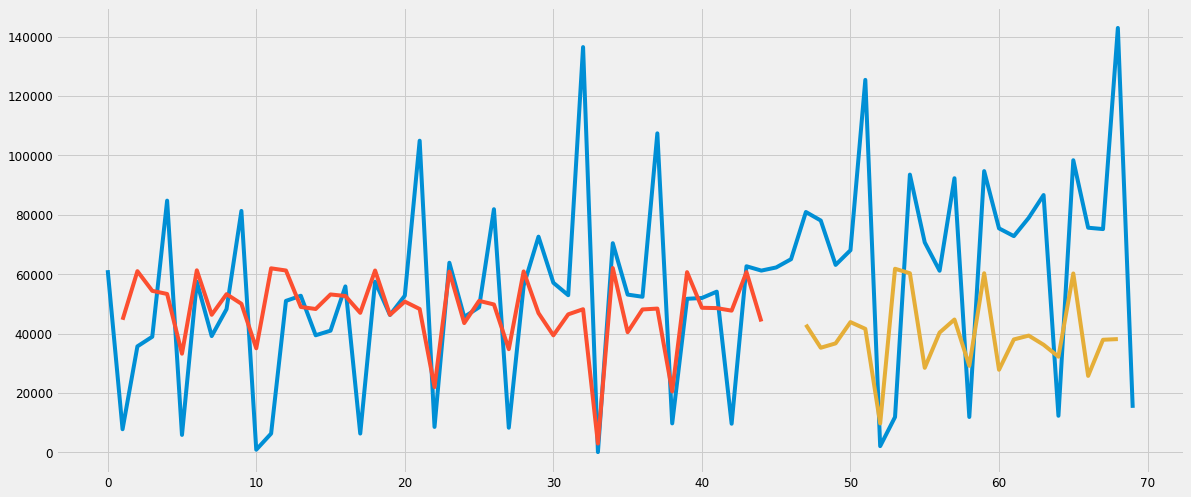

In [94]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [95]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [96]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [97]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
42/42 - 0s - loss: 0.1034
Epoch 2/100
42/42 - 0s - loss: 0.0701
Epoch 3/100
42/42 - 0s - loss: 0.0561
Epoch 4/100
42/42 - 0s - loss: 0.0507
Epoch 5/100
42/42 - 0s - loss: 0.0494
Epoch 6/100
42/42 - 0s - loss: 0.0484
Epoch 7/100
42/42 - 0s - loss: 0.0484
Epoch 8/100
42/42 - 0s - loss: 0.0476
Epoch 9/100
42/42 - 0s - loss: 0.0477
Epoch 10/100
42/42 - 0s - loss: 0.0476
Epoch 11/100
42/42 - 0s - loss: 0.0470
Epoch 12/100
42/42 - 0s - loss: 0.0469
Epoch 13/100
42/42 - 0s - loss: 0.0467
Epoch 14/100
42/42 - 0s - loss: 0.0469
Epoch 15/100
42/42 - 0s - loss: 0.0462
Epoch 16/100
42/42 - 0s - loss: 0.0460
Epoch 17/100
42/42 - 0s - loss: 0.0460
Epoch 18/100
42/42 - 0s - loss: 0.0457
Epoch 19/100
42/42 - 0s - loss: 0.0457
Epoch 20/100
42/42 - 0s - loss: 0.0454
Epoch 21/100
42/42 - 0s - loss: 0.0455
Epoch 22/100
42/42 - 0s - loss: 0.0451
Epoch 23/100
42/42 - 0s - loss: 0.0449
Epoch 24/100
42/42 - 0s - loss: 0.0444
Epoch 25/100
42/42 - 0s - loss: 0.0444
Epoch 26/100
42/42 - 0s - loss: 0.

In [98]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [99]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [100]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26222.51 RMSE
Test Score: 42484.39 RMSE


In [101]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [102]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

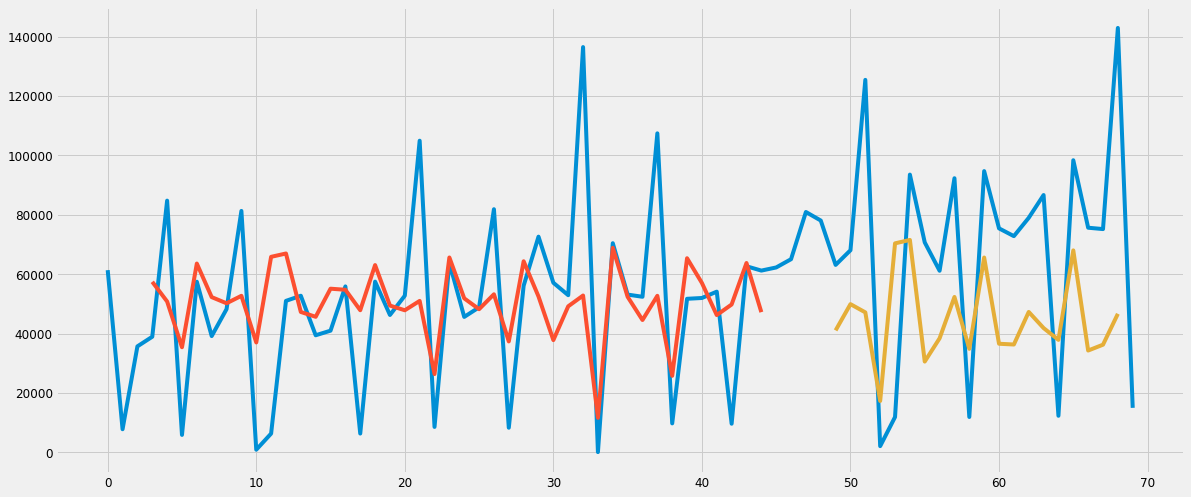

In [103]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [104]:
#LSTM FOR REGRESSION WITH THIME STEPS
import pandas as pd
d3 = pd.read_excel('data_finale_master.xlsx', index_col=0)

52/52 - 0s - loss: 0.0581
52/52 - 0s - loss: 0.0508
52/52 - 0s - loss: 0.0497
52/52 - 0s - loss: 0.0491
52/52 - 0s - loss: 0.0486
52/52 - 0s - loss: 0.0482
52/52 - 0s - loss: 0.0478
52/52 - 0s - loss: 0.0474
52/52 - 0s - loss: 0.0470
52/52 - 0s - loss: 0.0466
52/52 - 0s - loss: 0.0462
52/52 - 0s - loss: 0.0459
52/52 - 0s - loss: 0.0456
52/52 - 0s - loss: 0.0452
52/52 - 0s - loss: 0.0450
52/52 - 0s - loss: 0.0447
52/52 - 0s - loss: 0.0445
52/52 - 0s - loss: 0.0443
52/52 - 0s - loss: 0.0441
52/52 - 0s - loss: 0.0440
52/52 - 0s - loss: 0.0438
52/52 - 0s - loss: 0.0437
52/52 - 0s - loss: 0.0435
52/52 - 0s - loss: 0.0434
52/52 - 0s - loss: 0.0432
52/52 - 0s - loss: 0.0431
52/52 - 0s - loss: 0.0429
52/52 - 0s - loss: 0.0429
52/52 - 0s - loss: 0.0427
52/52 - 0s - loss: 0.0426
52/52 - 0s - loss: 0.0424
52/52 - 0s - loss: 0.0423
52/52 - 0s - loss: 0.0421
52/52 - 0s - loss: 0.0419
52/52 - 0s - loss: 0.0417
52/52 - 0s - loss: 0.0416
52/52 - 0s - loss: 0.0414
52/52 - 0s - loss: 0.0412
52/52 - 0s -

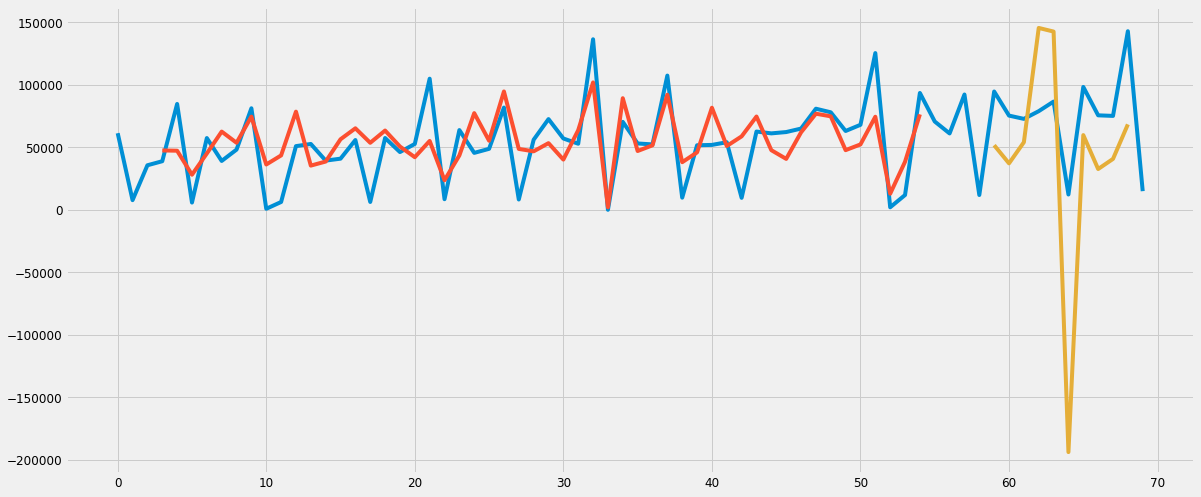

In [105]:
from keras.layers import Dropout
#LSTM with Memory Between Batches
import pandas as pd
d4 = pd.read_excel('data_finale_master.xlsx', index_col=0)
dataset = d4.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(80, batch_input_shape=(batch_size, look_back, 1), stateful=True))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
